In [3]:
import librosa
import os # библиотека для работы с файлами
import matplotlib.pyplot as plt
import librosa.display as ld
import numpy as np
import pandas as pd
import random

## Предобработка одного файла

### Загрузка сигнала

In [38]:
dir = 'songs/' #задаем директорию с данными
file = dir+'a-ha -- Take On Me.mp3'
signal, sr = librosa.load(file, sr = 22050) # загружаем файл
print(signal)

[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -7.515433e-06 -8.081498e-06
 -8.260290e-06]


### Представление в виде звуковой волны

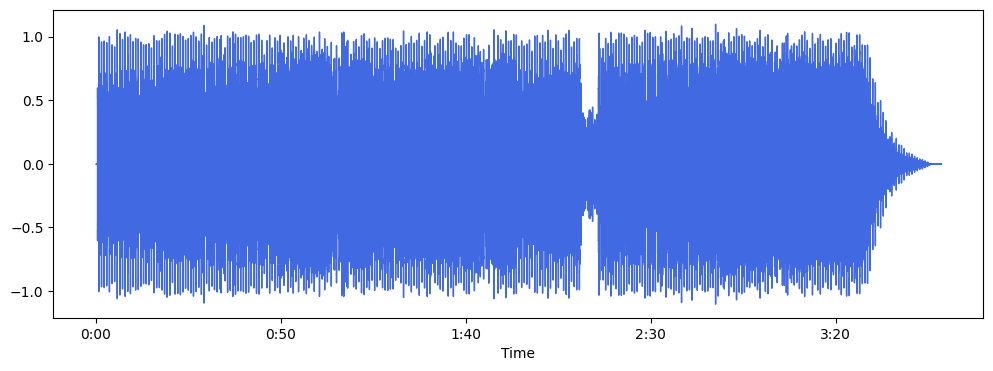

In [39]:
plt.figure(figsize=(12,4))
ld.waveshow(signal, sr=sr, color='royalblue')

### Получение спектра сигнала

Среднее значение: 0.00084295805
Дисперсия: 8.048017e-06


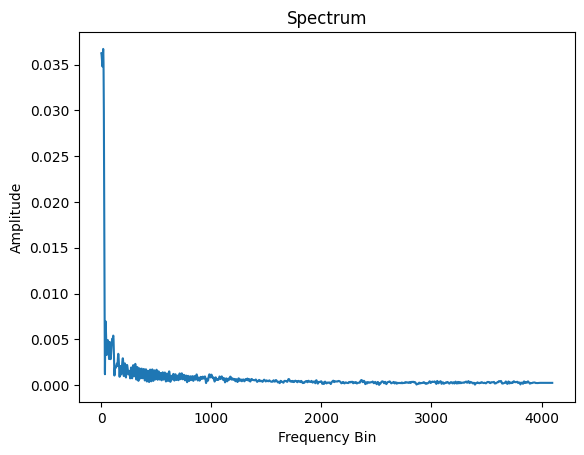

In [40]:
n_fft = 8195
hop_length = n_fft // 2
ft = np.abs(librosa.stft(signal[:n_fft], n_fft=n_fft, hop_length=hop_length))
mean_ft = np.mean(ft, axis=1)  # Усредняем по всем каналам

plt.plot(mean_ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

print("Среднее значение:", np.mean(mean_ft))
print("Дисперсия:", np.var(mean_ft))

### Получение спектрограммы

Среднее значение амплитуды: -3.834793
Дисперсия амплитуды: 194.87955


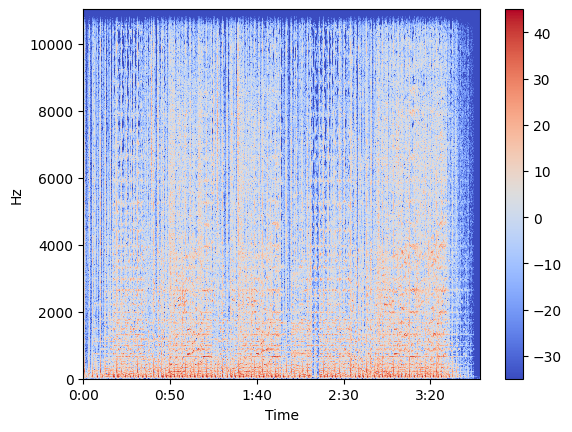

In [41]:
X = librosa.stft(signal)
s = librosa.amplitude_to_db(abs(X))
ld.specshow(s, sr=sr, x_axis = 'time', y_axis='linear')
plt.colorbar()
print('Среднее значение амплитуды:', np.mean(s))
print("Дисперсия амплитуды:", np.var(s))

### Вычисление мел-кепстральных коэффициентов

In [42]:
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc = 40, hop_length=512)
print(mfccs)
print(mfccs.shape)

print("Среднее значение всех коэффициентов MFCC:", np.mean(mfccs))
print("Дисперсия всех коэффициентов MFCC:", np.var(mfccs))

[[-534.2127 -534.2127 -534.2127 ... -534.2127 -534.2127 -534.2127]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 ...
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]]
(40, 9842)
Среднее значение всех коэффициентов MFCC: 0.6736717
Дисперсия всех коэффициентов MFCC: 573.9571


### Построение мел-спектрограммы

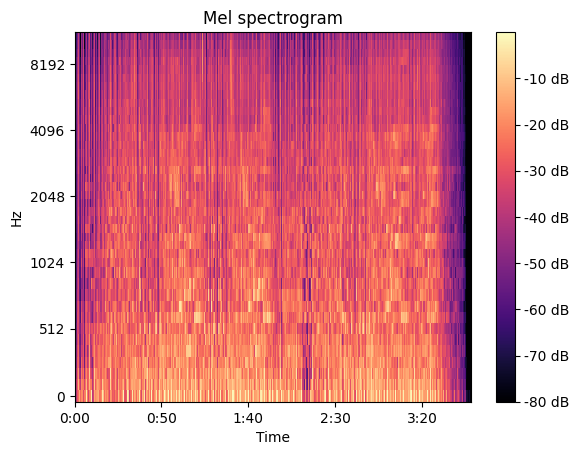

Среднее значение амплитуды: -32.74054
Дисперсия амплитуды: 150.70802


In [43]:
melspectrum = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=512, n_mels=40)
melspectrum_db = librosa.power_to_db(melspectrum, ref=np.max)  # Преобразуем в децибелы

ld.specshow(melspectrum_db, x_axis='time', y_axis='mel', sr=sr, hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

print('Среднее значение амплитуды:', np.mean(melspectrum_db))
print("Дисперсия амплитуды:", np.var(melspectrum_db))

### Вычисление спектрального центроида

Среднее значение центроида спектра: 3066.568413651277
Дисперсия центроида спектра: 499709.4965681579


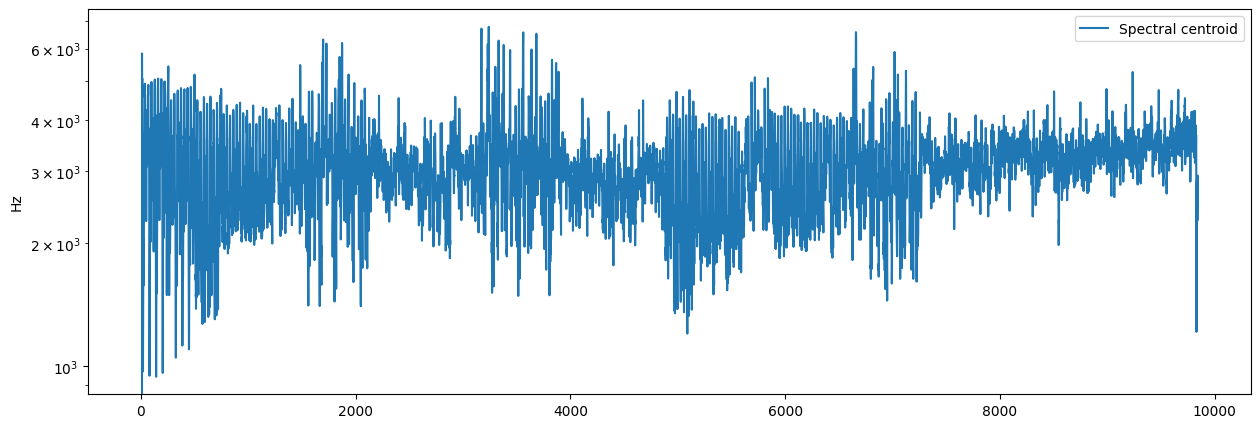

In [44]:
cent = librosa.feature.spectral_centroid(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.legend()

print("Среднее значение центроида спектра:", np.mean(cent))
print("Дисперсия центроида спектра:", np.var(cent))

### Вычисление спектрального спада

Среднее значение: 6386.644778516181
Дисперсия: 1307465.8105886956


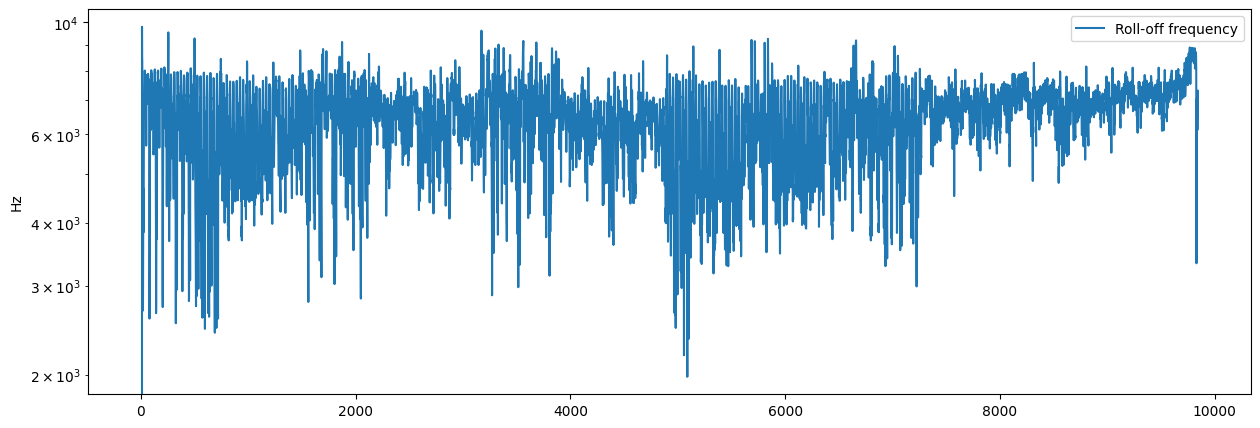

In [45]:
rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.legend()

print("Среднее значение:", np.mean(rolloff))
print("Дисперсия:", np.var(rolloff))

### Вычисление скорости пересечения нуля

Среднее значение: 0.15746048305413027
Дисперсия: 0.004605207668726599


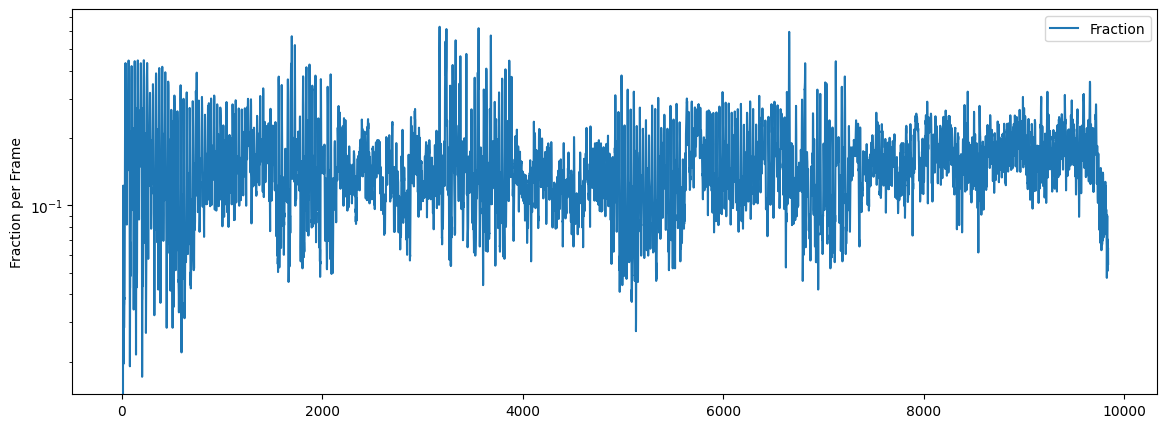

In [46]:
zrate=librosa.feature.zero_crossing_rate(signal)
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.legend()

print("Среднее значение:", np.mean(zrate))
print("Дисперсия:", np.var(zrate))

## Предобработка всех файлов директории, создание датафрейма

### Извлечение характеристик из файлов

In [8]:
n_fft = 8195
sr = 22050
hop_length = n_fft // 2

def spectrum_feature(signal):
    ft = np.abs(librosa.stft(signal[:n_fft], n_fft=n_fft, hop_length=hop_length))
    mean_ft = np.mean(ft, axis=1)  # Усредняем по всем каналам

    return np.mean(mean_ft), np.var(mean_ft)

def db_spectrum_feature(signal):
    X = librosa.stft(signal)
    s = librosa.amplitude_to_db(abs(X))

    return np.mean(s), np.var(s)

def melspectrum_feature(signal):
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc = 40, hop_length=512)

    return np.mean(mfccs), np.var(mfccs)

def db_melspectrum_feature(signal):
    melspectrum = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=512, n_mels=40)
    melspectrum_db = librosa.power_to_db(melspectrum, ref=np.max)  # Преобразуем в децибелы

    return np.mean(melspectrum_db), np.var(melspectrum_db)

def spectral_cent_feature(signal):
    cent = librosa.feature.spectral_centroid(y=signal, sr=sr)

    return np.mean(cent), np.var(cent)

def spectral_rolloff_feature(signal):
    rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr)

    return np.mean(rolloff), np.var(rolloff)

def zero_crossing_feature(signal):
    zrate=librosa.feature.zero_crossing_rate(signal)

    return np.mean(zrate), np.var(zrate)

In [9]:
csv_path = 'songs_features.csv'

try:
    with open(csv_path, 'w') as file:
        file.truncate(0)
    print(f"Файл '{csv_path}' очищен успешно.")
except Exception as e:
    print(f"Ошибка при очистке файла '{csv_path}': {e}")


# Путь к папке с аудиокомпозициями
songs_dir = 'songs/'

# Список имен файлов в папке songs
file_names = os.listdir(songs_dir)

# Создание пустого DataFrame с колонкой "filename"
df = pd.DataFrame({'filename': file_names})

# Добавление признаков в DataFrame
for func_name, func in [('spectrum_feature', spectrum_feature),
                        ('db_spectrum_feature', db_spectrum_feature),
                        ('melspectrum_feature', melspectrum_feature),
                        ('db_melspectrum_feature', db_melspectrum_feature),
                        ('spectral_cent_feature', spectral_cent_feature),
                        ('spectral_rolloff_feature', spectral_rolloff_feature),
                        ('zero_crossing_feature', zero_crossing_feature)]:
    # Применение функции к каждому файлу и добавление результатов в DataFrame
    mean_var = df['filename'].apply(lambda x: pd.Series(func(librosa.load(songs_dir + x, sr=22050)[0]))) # решить с каналом
    df[[f'{func_name}_mean', f'{func_name}_var']] = mean_var

# Вывод DataFrame
print(df)
df.to_csv(csv_path, index=False)

Файл 'songs_features.csv' очищен успешно.
                                             filename  spectrum_feature_mean  \
0       7 Seconds -- Youssou N'Dour, Neneh Cherry.mp3           1.415024e-03   
1                              a-ha -- Take On Me.mp3           8.429580e-04   
2                     ABBA -- Money, Money, Money.mp3           7.433493e-20   
3                 ABBA -- The Winner Takes It All.mp3           8.187937e-06   
4                         All The Things She Said.mp3           6.735864e-02   
5                         Animals — Martin Garrix.mp3           1.317450e+00   
6              Another One Bites The Dust — Queen.mp3           2.534112e+00   
7                                       Apologize.mp3           5.115469e-01   
8                                       Appletree.mp3           1.043127e+00   
9   B.o.B, Hayley Williams of Paramore -- Airplane...           1.066156e-01   
10                   B.o.B, Jessie J -- Price Tag.mp3           1.173418e+00  

## Построение модели

In [10]:
from sklearn import preprocessing


df = pd.read_csv('songs_features.csv')
class_list = df['filename'].unique()
X = df.iloc[0:, 1:]
convertor = preprocessing.LabelEncoder()
y=convertor.fit_transform(class_list) # конвертируем признаки

print(y)

[ 0 14  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [11]:
cols = X.columns
scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

print(X)

    spectrum_feature_mean  spectrum_feature_var  db_spectrum_feature_mean  \
0               -0.840081             -0.555267                 -0.759836   
1               -0.840796             -0.555267                  0.367375   
2               -0.841849             -0.555267                 -0.579680   
3               -0.841839             -0.555267                 -0.330077   
4               -0.757672             -0.545788                  0.587593   
5                0.804538             -0.437673                 -0.080742   
6                2.324973              3.245926                 -1.118361   
7               -0.202581             -0.311482                 -0.299606   
8                0.461723              0.870886                 -2.448539   
9               -0.708614             -0.549235                  0.667969   
10               0.624544              0.052872                  0.901315   
11              -0.702108             -0.552964                 -0.180478   

In [12]:
X_train = X
X_test = X
y_train = y
y_test = y

indices = list(range(len(X_test)))
random.shuffle(indices)
X_test = X_test.iloc[indices]
y_test = y_test[indices]

print(X_train)
print(y_train)
print(X_test)
print(y_test)

    spectrum_feature_mean  spectrum_feature_var  db_spectrum_feature_mean  \
0               -0.840081             -0.555267                 -0.759836   
1               -0.840796             -0.555267                  0.367375   
2               -0.841849             -0.555267                 -0.579680   
3               -0.841839             -0.555267                 -0.330077   
4               -0.757672             -0.545788                  0.587593   
5                0.804538             -0.437673                 -0.080742   
6                2.324973              3.245926                 -1.118361   
7               -0.202581             -0.311482                 -0.299606   
8                0.461723              0.870886                 -2.448539   
9               -0.708614             -0.549235                  0.667969   
10               0.624544              0.052872                  0.901315   
11              -0.702108             -0.552964                 -0.180478   

## Обучение

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [ ]:
def model_assess(model, title = "Default"):
	model.fit(X_train, y_train)
	preds = model.predict(X_test)
	print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
	

# алгоритм Баейса
nb = GaussianNB()
model_assess(nb, "Naive Bayes")
# алгоритм k-ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10)
model_assess(knn, "KNN")
# метод опорных векторов
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")
# логистическая регрессия
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")
# случайный лес
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")
# многослойный персептрон
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

models = [nb, knn, svm, lg, rforest, nn]

Accuracy Naive Bayes : 1.0 

Accuracy KNN : 0.06667 

Accuracy Support Vector Machine : 1.0 

Accuracy Logistic Regression : 1.0 

Accuracy Random Forest : 1.0 

Accuracy Neural Nets : 1.0 



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Строим матрицу косинусного сходства на основе X_train
cosine_sim = cosine_similarity(X_train)

# Преобразуем матрицу косинусного сходства в DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=X_train.index, columns=X_train.index)

# Добавляем колонку filename
cosine_sim_df.insert(0, "filename", class_list)

# Выводим первые строки DataFrame
print(cosine_sim_df.head())

                                        filename         0         1  \
0  7 Seconds -- Youssou N'Dour, Neneh Cherry.mp3  1.000000 -0.254898   
1                         a-ha -- Take On Me.mp3 -0.254898  1.000000   
2                ABBA -- Money, Money, Money.mp3 -0.162960 -0.242853   
3            ABBA -- The Winner Takes It All.mp3 -0.344667  0.188227   
4                    All The Things She Said.mp3 -0.343155  0.380296   

          2         3         4         5         6         7         8  \
0 -0.162960 -0.344667 -0.343155  0.208560 -0.072122  0.464531  0.249060   
1 -0.242853  0.188227  0.380296 -0.330125 -0.362661 -0.592119 -0.757387   
2  1.000000  0.758596  0.341649 -0.607899 -0.118083 -0.240292  0.448938   
3  0.758596  1.000000  0.256970 -0.710943 -0.158391 -0.319081  0.173755   
4  0.341649  0.256970  1.000000 -0.540638 -0.347776 -0.175671 -0.547123   

          9        10        11        12        13        14  
0 -0.274263 -0.009405  0.042443 -0.054791 -0.165492 

## Тестирование

In [ ]:
df_copy = df.copy()

In [29]:
df = pd.read_csv('songs_features.csv')
filename_new = 'Timbaland_-_Apologize_47972715.mp3'
signal = librosa.load(filename_new, sr=22050)[0]
spectrum_mean, spectrum_var = spectrum_feature(signal)
db_spectrum_mean, db_spectrum_var = db_spectrum_feature(signal)
melspectrum_mean, melspectrum_var = melspectrum_feature(signal)
db_melspectrum_mean, db_melspectrum_var = db_melspectrum_feature(signal)
spectral_cent_mean, spectral_cent_var = spectral_cent_feature(signal)
spectral_rolloff_mean, spectral_rolloff_var = spectral_rolloff_feature(signal)
zero_crossing_mean, zero_crossing_var = zero_crossing_feature(signal)

new_features = [spectrum_mean, spectrum_var, db_spectrum_mean, db_spectrum_var, melspectrum_mean, melspectrum_var, db_melspectrum_mean, db_melspectrum_var, spectral_cent_mean, spectral_cent_var, spectral_rolloff_mean, spectral_rolloff_var, zero_crossing_mean, zero_crossing_var]
new_features = np.array(new_features).reshape(1, -1)



X = df.drop(columns=['filename'])
print(X)
print('Features:')
print(new_features)

    spectrum_feature_mean  spectrum_feature_var  db_spectrum_feature_mean  \
0            1.415024e-03          5.448380e-06                 -8.287863   
1            8.429581e-04          8.048017e-06                 -3.834793   
2            7.433493e-20          1.894931e-39                 -7.576152   
3            8.187937e-06          3.205970e-11                 -6.590091   
4            6.735864e-02          2.151134e-01                 -2.964818   
5            1.317450e+00          2.668646e+00                 -5.605087   
6            2.534112e+00          8.626266e+01                 -9.704225   
7            5.115468e-01          5.532359e+00                 -6.469716   
8            1.043127e+00          3.236451e+01                -14.959120   
9            1.066156e-01          1.368918e-01                 -2.647291   
10           1.173418e+00          1.380086e+01                 -1.725452   
11           1.118220e-01          5.227377e-02                 -5.999099   

In [30]:
# Вычислите расстояния между наборами признаков
distances = np.linalg.norm(X.values - new_features, axis=1)

# Найдите индекс строки с минимальным расстоянием
closest_index = np.argmin(distances)

# Получите название файла из найденной строки
closest_file = df.iloc[closest_index]['filename']

print(f"Наиболее похожий файл: {closest_file}")


Наиболее похожий файл: Apologize.mp3
